# Introduction to Data Science
## Homework 5

Student Name: Wenjie Sun

Student Netid: ws854
***

### Part 1: Naive Bayes

1\. From your reading you know that the naive Bayes classifier works by calculating the conditional probabilities of each feature, $e_i$, occuring with each class $c$ and treating them independently. This results in the probability of a certain class occuring given a set of features, or a piece of evidence, $E$, as

$$P(c \mid E) = \frac{p(e_1 \mid c) \cdot p(e_2 \mid c) \cdot \cdot \cdot p(e_k \mid c) \cdot p(c)}{p(E)}.$$

The conditional probability of each piece of evidence occuring with a given class is given by

$$P(e_i \mid c) = \frac{\text{count}(e_i, c)}{\text{count}(c)}.$$

In the above equation $\text{count}(e_i, c)$ is the number of documents in a given class that contain feature $e_i$ and $\text{count}(c)$ is the number of documents that belong to class $c$. 

A common variation of the above is to use Laplace (sometimes called +1) smoothing. Recall the use of Laplace smoothing introduced toward the end of Chapter 3 in the section Probability Estimation. This is done in sklearn by setting `alpha=1` in the `BernoulliNB()` function (this is also the default behavior). The result of Laplace smoothing will slightly change the conditional probabilities,

$$P(e_i \mid c) = \frac{\text{count}(e_i, c) + 1}{\text{count}(c) + 2}.$$

In no more than **one paragraph**, describe why this is useful. Try to think of a case when not using Laplace smoothing would result in "bad" models. Try to give an example. Be precise.

**Answer:** 

When there is a test instance that didn't come up in the training set, the posterior probability will become 0, which will change the probability to 0 totally. So, adding a one can avoid these extreme cases even if when the instance didn't come up in the training set.

### Part 2: Text classification for sentiment analysis
For this part of the assignment, we are going to use a data set of movie ratings from IMDB.com. The data consists of the text of a movie review and a target variable which tells us whether the reviewer had a positive feeling towards the movie (equivalent to rating the movie between 7 and 10) or a negative feeling (rating the movie between 1 and 4). Neutral reactions are not included in the data.

The data are located in "`data/imdb.csv`". The first column is the review text; the second is the text label 'P' for positive or 'N' for negative.

1\. Load the data into a pandas `DataFrame()`.

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn import metrics
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_curve, auc, roc_auc_score
import matplotlib.pylab as plt
%matplotlib inline

In [6]:
import pandas as pd
data = pd.read_csv("imdb.csv")

2\. Code the target variable to be numeric: use the value `1` to represent 'P' and `0` to represent 'N'.

In [7]:
data['Class'] = pd.Series(data['Class'] == 'P', dtype=int)

In [8]:
data.head()

,Text,Class
0,'One of the first of the best musicals Anchors...,1
1,'Visually disjointed and full of itself the di...,0
2,'These type of movies about young teenagers st...,1
3,'I would rather of had my eyes gouged out with...,0
4,'The title says it all. Tail Gunner Joe was a ...,0


3\. Put all of the text into a data frame called `X` and the target variable in a data frame called `Y`. Make a train/test split where you give 75% of the data to training.

In [11]:
from sklearn.cross_validation import train_test_split

X = data['Text']
Y = data['Class']

X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size = 0.75)



4\. Create a binary `CountVectorizer()` and `TfidfVectorizer()`. Use the original single words as well as bigrams. Also, use an "english" stop word list. Fit these to the training data to extract a vocabulary and then transform both the train and test data.

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

count_vectorizer = CountVectorizer(binary=True, stop_words = "english", ngram_range = (1,2))
tfidf_vectorizer = TfidfVectorizer(binary=True, stop_words = "english", ngram_range = (1,2))

count_vectorizer.fit(X_train)
tfidf_vectorizer.fit(X_train)

X_train_count_vectorizer = count_vectorizer.transform(X_train)
X_test_count_vectorizer = count_vectorizer.transform(X_test)

X_train_tfidf_vectorizer = tfidf_vectorizer.transform(X_train)
X_test_tfidf_vectorizer = tfidf_vectorizer.transform(X_test)

4\. Create `LogisticRegression()` and `BernoulliNB()` models. For all settings, keep the default values. In a single plot, show the AUC curve for both classifiers and both the binary and tfidf feature sets. In the legend, include the area under the ROC curve (AUC). Do not forget to label your axes. Your final plot will be a single window with 4 curves.

Which model do you think does a better job? Why? Explain in no more than a paragraph.

In [18]:
def plotROC(model,x_train,x_test,y_train,y_test,label):
    clf = model()
    clf.fit(x_train,y_train)
    tprs =[]
    fprs =[]
    fpr, tpr, thresholds = metrics.roc_curve(y_test, clf.predict_proba(x_test)[:,1])
    roc_auc = auc(fpr,tpr)
    tprs.append(tpr)
    fprs.append(fpr)
    return fpr,tpr,label,roc_auc

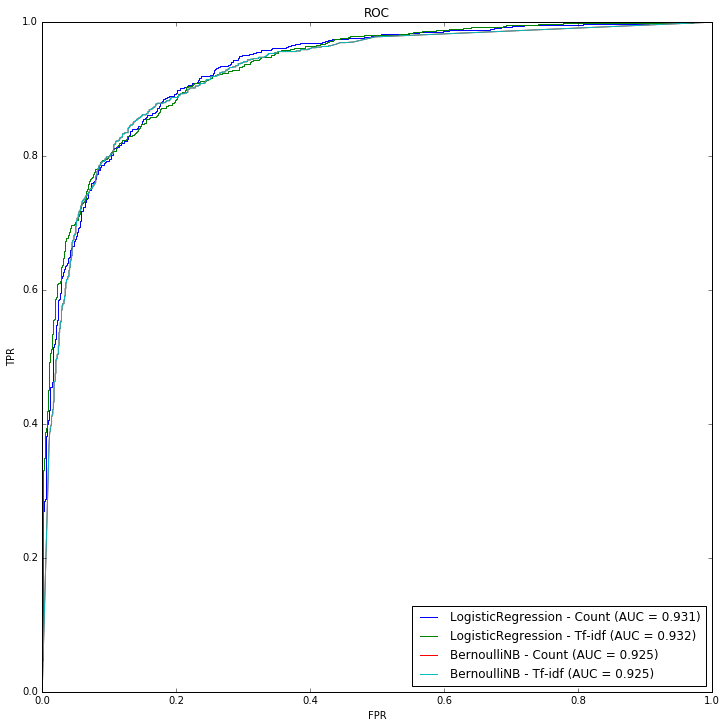

In [19]:
x_1,y_1,z_1,r_1 = plotROC(LogisticRegression,X_train_count_vectorizer,X_test_count_vectorizer,Y_train,Y_test, "LogisticRegression - Count")
x_2,y_2,z_2,r_2 = plotROC(LogisticRegression,X_train_tfidf_vectorizer,X_test_tfidf_vectorizer,Y_train,Y_test,"LogisticRegression - Tf-idf")
x_3,y_3,z_3,r_3 = plotROC(BernoulliNB,X_train_count_vectorizer,X_test_count_vectorizer,Y_train,Y_test,"BernoulliNB - Count")
x_4,y_4,z_4,r_4 = plotROC(BernoulliNB,X_train_tfidf_vectorizer,X_test_tfidf_vectorizer,Y_train,Y_test,"BernoulliNB - Tf-idf")

#fig = plt.figure(figsize= (9,5))
#ax = fig.add_subplot(111)
plt.rcParams['figure.figsize'] = 12, 12
plt.plot(x_1,y_1, label = z_1 + " (AUC = %0.3f)" % r_1 )
plt.plot(x_2,y_2, label = z_2 + " (AUC = %0.3f)" % r_2 )
plt.plot(x_3,y_3, label = z_3 + " (AUC = %0.3f)" % r_3 )
plt.plot(x_4,y_4, label = z_4 + " (AUC = %0.3f)" % r_4 )

plt.legend(loc = "lower right")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.show()


**Answer:**

It seems that all 4 models are almost the same since the difference between tf-idf and count is that tfidf normalizes the count results, which makes them behave similarly. However, LogisticRegression on binary CountVectorizer works slightly better than the other Bernoulli Naive Bayes model in this case. In scikit-learn doc, it also mentioned that multinomialNB suits best for the text mining. So, I think that is probably a reason why the Bernoulli didn't work differently from Logistic Regression.

5\. Use the model from question 4 that you think did the best job and predict the rating of the test data. Find 5 examples the should have been positive, but were incorrectly classified as negative. Print out the reviews below and include an explanation as to why you think it may have been incorrectly classified. You can pick any 5. They do not have to be at random.

In [21]:
clf = LogisticRegression()
clf.fit(X_train_count_vectorizer,Y_train)
Y_pred = clf.predict(X_test_count_vectorizer)

misclassified = (Y_pred != Y_test)

DF = pd.DataFrame(
    {'X_Test': list(X_test[misclassified]),
     'Y_Test': list(Y_test[misclassified])
    })
pd.set_option('display.max_colwidth', -1)
DF[DF["Y_Test"] == 1 ].head(5)

,X_Test,Y_Test
1,'Hardly a masterpiece. Not so well written. Beautiful cinematography i think not. This movie wasnt too terrible but it wasnt that much better than average. The main story dealing with highly immoral teens should have focused more on the forbidden romance and why this was... should have really gotten into it instead of scraping the surface with basically because mom says we cant. Some parts should have been dropped altogether or reworked to have more importance to the plight of the two main characters. Couple times i was wondering if the writer/director was a fan of George Lucas classic American Graffiti. Not that its wrong to be a fan of that movie but to make your movie at times look like that i mean come on! Worst part of this was that Madchen Amick had such a small part i mean double come on!! She was the only one in one or two lines who actually tried a southern accent. (Take a good listen it was there even though her character was from California! DOH!!) Maybe if she was the star others could have followed and we would have had a more authentically sounding movie. Oh well what can ya do when you have a director whos just a director and not an artist also. Too bad. Overall i give this a B- and thats being a little generous cause im partial to Ms. Amick.',1
3,'After tracking it down for half a year I finally found a copy and it was not disappointing. Not disappointing because Im one of those die hard SMAP fans who need to see all their works and I finally got to see the so called hot film of Goro. But I couldnt believe Goro was forced to make a movie as such. In his respectable self now Im sure he cringes that he made this movie. Nevertheless they found the perfect person for looking embarrassed ill at ease and half depressed most of the time. Man I still cant believe he made this movie...I had to cover my eyes at many parts not believing he really made such a movie....hahahaha.... But Im glad to have watched it. Thank goodness he has grown up....',1
5,'this movie is awesome. sort of. it dosent really say much or do much but it is an awesome movie to watch because of how stupid it is. the high school is taken over by evil ms.togar that hates the one thing that all the students love rock& roll. riff randle get everyone tickets for the ramones show and this movie peaks with a take over of the school led my riff randle & the ramones. this movie has everything a bad script questionable directing bad actors(ie clint howard & p.j. soles) an awesome soundtrackextreme campyness these elements & much more come together to make this what it isa classic. note - during the live ramones set notice that darby crash of the germs is in the front of the crowd. neat-o.',1
9,'Shintarô Katsu best known for the Zatôichi films again stars in this third and final movie in the Kenji Misumi (mostly known for Lone Wolf and Cub) directed saga of Hanzo The Razor Itami feature the big dicked one battling ninjas rapeing ghosts and uncovering shady goings on at the Shogunate treasury. The Hanzo plot was kinda getting stale and repetitive. What was once novel in the first film was not any longer. Fortunately this one was better then the second thanks to having more humor. Im just glad that they choose to stop at the one trilogy (Im looking at YOU Lucas) My Grade: B DVD Extras: Merely Trailers for all 3 Hanzo the Razor films Eye Candy: Aoi Nakajima unleashes both tits Mako Midori just her left one',1
10,'Once again I was browsing through the discount video bin and picked up this movie for $4.88. Fifty-percent of the time the movies I find in the bin are pure crap (I mean horrible beyond belief) but half the time they turn out to be surprisingly good. This movie is much better than I expected. I found it very engaging though it was obviously made by an amateur. The direction is nothing special but the story is intriguing with some good thrills. I expected it to be more of a comedy but I wasnt too disappointed. For a thriller this movie is s

In [16]:
#count_vectorizer.vocabulary_

**Answer**:

There 2 different types. As the first one, the reivew self is pretty negative, even though it was classified as a postive case in the true condition. I think it is counted as a false positive is not really a fault of the algorithm.

The other type is tricked by negative words, like "how stupid", "hates", "bad" in the 3rd instance. Reviews like this are in general mixed with bad and good. 